In [1]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline


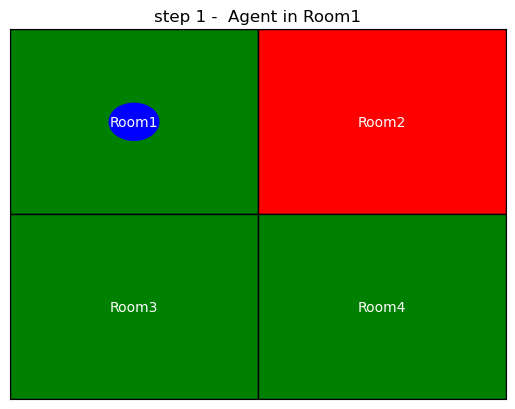

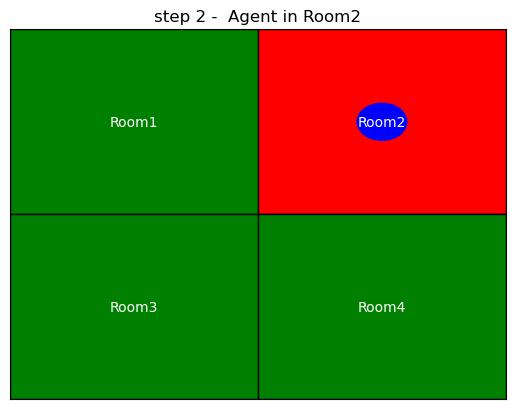

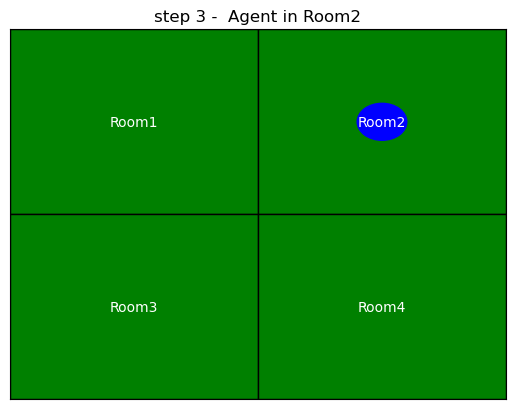

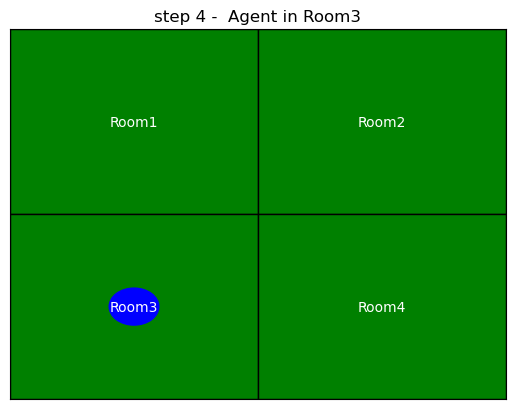

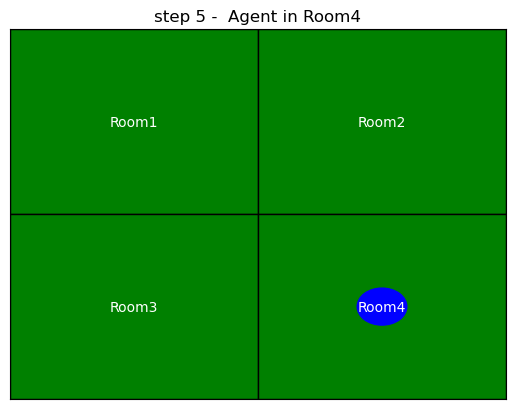

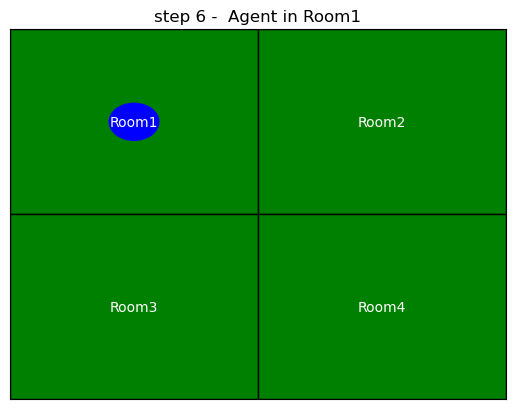

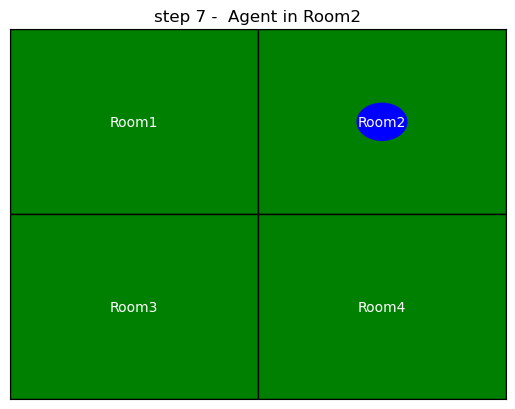

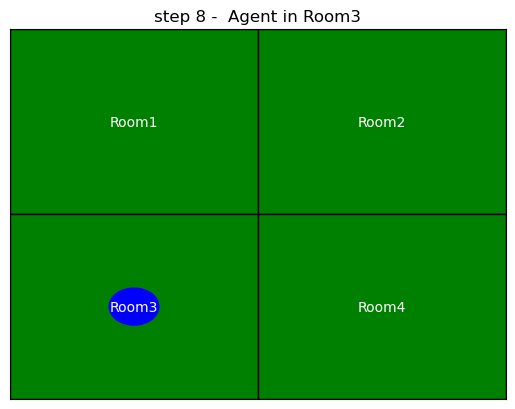

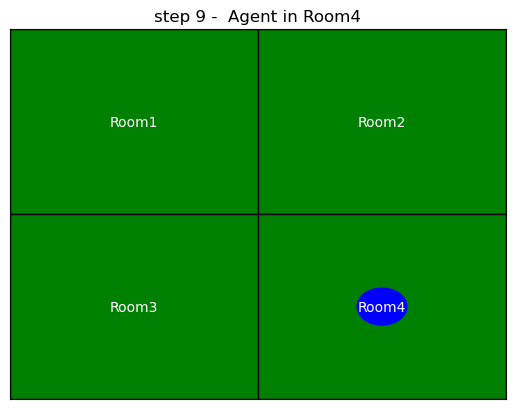

Simulation Complete


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches  as patches
import time


#environments 2*2
environment={
    "Room1":"clean",
    "Room2":"Dirty",
    "Room3":"Clean",
    "Room4":"Clean",

}


#mapping for grid positions
room_positions={
    "Room1":(0,1), #Top-Left
    "Room2":(1,1),  #Top-Right
    "Room3":(0,0),  #Bottom-Left
    "Room4":(1,0)   #Bottom-right
}

rooms=list(environment.keys())
agent_index=0  #means the agent starts in Room1

def reflex_agent(state):
    if state=="Dirty":
        return "Clean"
    else:
        return"Move"
    

def draw_environment(env,agent_pos,step):
    fig,ax=plt.subplots()
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"step {step} -  Agent in {rooms[agent_pos]}")
    
    for room , pos in room_positions.items():
        x,y=pos
        color='red' if env[room] == "Dirty" else "green"
        rect=patches.Rectangle((x,y),1,1,facecolor=color,edgecolor='black')
        ax.add_patch(rect)
        ax.text(x+0.5,y+0.5,room,ha='center',va='center',color='white')
        
    agent_x,agent_y=room_positions[rooms[agent_pos]]
    agent_patch=patches.Circle((agent_x + 0.5,agent_y + 0.5),0.1,color='blue')
    ax.add_patch(agent_patch)
    
    plt.pause(1)
    plt.close()
    
    
#run simulation

plt.ion()
steps=9
for step in range(steps):
    current_room=rooms[agent_index]
    state=environment[current_room]
    action=reflex_agent(state)
    
    draw_environment(environment,agent_index,step+1)
    if action == "Clean":
        environment[current_room]="Clean"
    else:
        agent_index=(agent_index+1)% len(rooms)
        
plt.ioff()
print("Simulation Complete")
    
    